競賽頁面：https://www.kaggle.com/t/273bcc14b7b4485bbd3ddb5df990b329

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'Enron_train.csv')
f_app_test = os.path.join(dir_data, 'Enron_test.csv')


# 讀取檔案
app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [22]:
app_train

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,STABLER FRANK,500000.0,NaN,NaN,NaN,frank.stabler@enron.com,NaN,16514.0,NaN,NaN,...,NaN,356071.0,False,511734.0,NaN,239502.0,NaN,NaN,1112087.0,511734.0
109,BROWN MICHAEL,NaN,NaN,NaN,NaN,michael.brown@enron.com,NaN,49288.0,41.0,13.0,...,NaN,NaN,False,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN
110,PICKERING MARK R,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,...,NaN,NaN,False,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0
111,HAUG DAVID L,NaN,NaN,NaN,NaN,david.haug@enron.com,NaN,475.0,19.0,4.0,...,NaN,NaN,False,2217299.0,NaN,NaN,471.0,573.0,475.0,2217299.0


In [23]:
print(app_train.shape)
print(app_test.shape)

(113, 22)
(33, 21)


In [24]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       113 non-null    object 
 1   bonus                      61 non-null     float64
 2   deferral_payments          28 non-null     float64
 3   deferred_income            34 non-null     float64
 4   director_fees              13 non-null     float64
 5   email_address              83 non-null     object 
 6   exercised_stock_options    81 non-null     float64
 7   expenses                   73 non-null     float64
 8   from_messages              65 non-null     float64
 9   from_poi_to_this_person    65 non-null     float64
 10  from_this_person_to_poi    65 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        49 non-null     float64
 13  other                      69 non-null     float64

In [25]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       33 non-null     object 
 1   bonus                      21 non-null     float64
 2   deferral_payments          11 non-null     float64
 3   deferred_income            15 non-null     float64
 4   director_fees              4 non-null      float64
 5   email_address              28 non-null     object 
 6   exercised_stock_options    21 non-null     float64
 7   expenses                   22 non-null     float64
 8   from_messages              21 non-null     float64
 9   from_poi_to_this_person    21 non-null     float64
 10  from_this_person_to_poi    21 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        17 non-null     float64
 13  other                      24 non-null     float64
 

In [26]:
app_train['poi'] = app_train['poi'].map({True:1, False:0})
app_train['poi'].dtype

dtype('int64')

In [27]:
app_train.describe()       

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,113.000000,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,0.115044,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,0.320497,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,0.000000,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,0.000000,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,0.000000,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,0.000000,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.000000,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


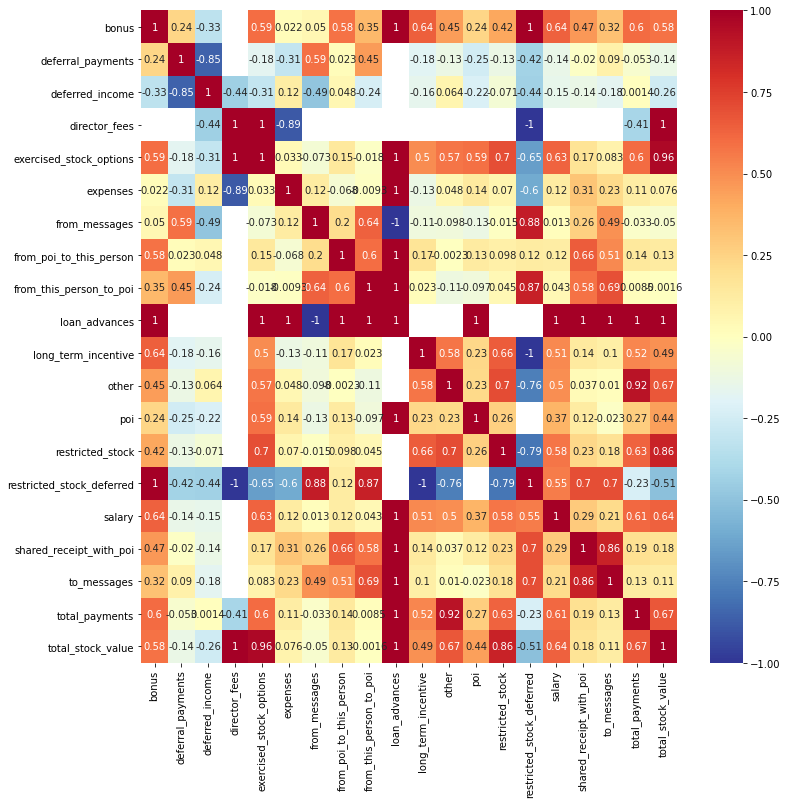

In [28]:
# 計算app_train整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
corr = app_train.corr()
# sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True,  vmax = 1)
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, annot = True)
plt.show()

In [29]:
corr['poi'].sort_values(ascending=False)

loan_advances                1.000000
poi                          1.000000
exercised_stock_options      0.591972
total_stock_value            0.443098
salary                       0.371917
total_payments               0.271335
restricted_stock             0.261102
bonus                        0.242170
long_term_incentive          0.227805
other                        0.225619
expenses                     0.136386
from_poi_to_this_person      0.127932
shared_receipt_with_poi      0.120467
to_messages                 -0.023047
from_this_person_to_poi     -0.096864
from_messages               -0.126760
deferred_income             -0.224654
deferral_payments           -0.251548
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64

In [30]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#補空缺值
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in app_train.columns:  
    if app_train[c].dtype == 'object':
        app_train[c] = app_train[c].fillna('None')
        app_train[c] = LEncoder.fit_transform(list(app_train[c].values))
    elif app_train[c].dtype == 'float64' or app_train[c].dtype == 'int64':
        app_train[c] = app_train[c].fillna(0)

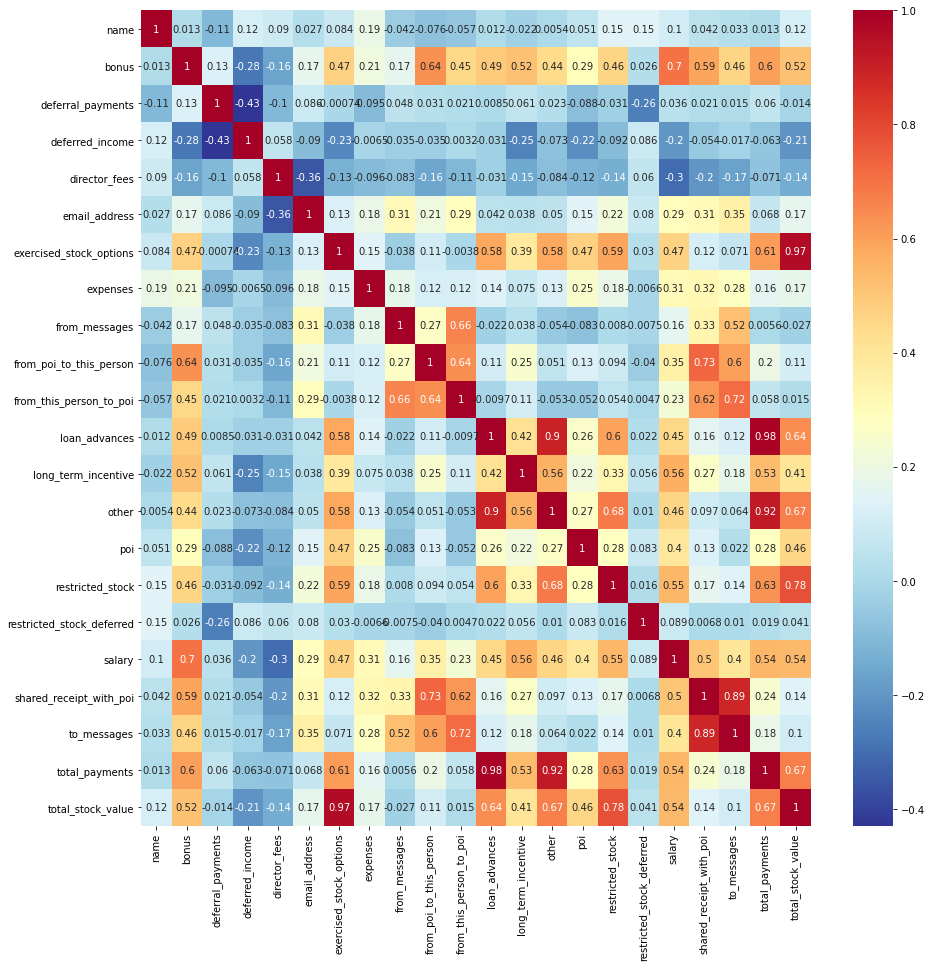

In [31]:
# 計算app_train整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
corr = app_train.corr()
# sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True,  vmax = 1)
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, annot = True)
plt.show()

In [32]:
corr['poi'].sort_values(ascending=False)

poi                          1.000000
exercised_stock_options      0.471984
total_stock_value            0.456709
salary                       0.395342
bonus                        0.292556
total_payments               0.281416
restricted_stock             0.279710
other                        0.270516
loan_advances                0.261912
expenses                     0.254843
long_term_incentive          0.217566
email_address                0.147304
from_poi_to_this_person      0.131200
shared_receipt_with_poi      0.129147
restricted_stock_deferred    0.082723
name                         0.051016
to_messages                  0.021519
from_this_person_to_poi     -0.051991
from_messages               -0.082758
deferral_payments           -0.087767
director_fees               -0.117651
deferred_income             -0.222006
Name: poi, dtype: float64

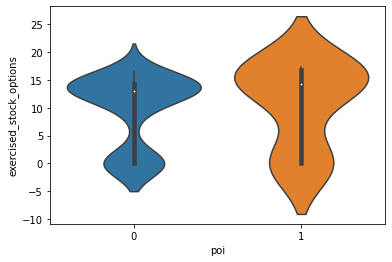

In [33]:
# 觀察重要特徵與目標的分布
# 第一名 : exercised_stock_options              
import seaborn as sns
import matplotlib.pyplot as plt
#sns.regplot(x=app_train['exercised_stock_options'], y=app_train['poi'], fit_reg=False)
sns.violinplot(x=app_train['poi'], y=np.log1p(app_train['exercised_stock_options']), fit_reg=False, scale="width")
# sns.boxplot(x=app_train['poi'], y=np.log1p(app_train['exercised_stock_options']))
plt.show()

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


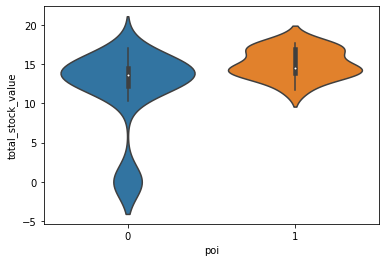

In [34]:
# 第二名 : total_stock_value
sns.violinplot(x=app_train['poi'], y=np.log1p(app_train['total_stock_value']), fit_reg=False, scale="width")
# sns.boxplot(x=app_train['poi'], y=np.log1p(app_train['total_stock_value']))
plt.show()

In [35]:
app_train['total_stock_value'].describe()

count    1.130000e+02
mean     3.058932e+06
std      6.791932e+06
min     -4.409300e+04
25%      2.211410e+05
50%      8.802900e+05
75%      2.072035e+06
max      4.911008e+07
Name: total_stock_value, dtype: float64

In [36]:
# 此筆資料似乎有異常(total_stock_value有負值), 先依規則調整
display(app_train[app_train['total_stock_value']<0])
# app_train['total_stock_value_N'] = app_train['exercised_stock_options']+app_train['restricted_stock']+app_train['restricted_stock_deferred']
# app_train[app_train['total_stock_value_N']!=app_train['total_stock_value']]
# app_train['total_payments_N'] = app_train['bonus']+app_train['deferral_payments']+app_train['deferred_income']+\
#                                 app_train['director_fees']+app_train['expenses']+app_train['loan_advances']+\
#                                 app_train['long_term_incentive']+app_train['other']+app_train['salary']
# app_train[app_train['total_payments_N']!=app_train['total_payments']]
#查看明細restricted_stock_deferred, deferral_payments值的正負, 實在不能確定是否正確: 決定移除此筆異常資料
# 移除此筆異常值
# app_train = app_train[app_train['total_stock_value']>=0]
app_train = app_train[app_train['total_stock_value']>=0]
app_train = app_train.reset_index(drop=True)      #要重建index

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
50,6,0.0,-102500.0,0.0,3285.0,0,3285.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,44093.0,0.0,0.0,0.0,102500.0,-44093.0


In [37]:
app_train['poi'].shape

(112,)

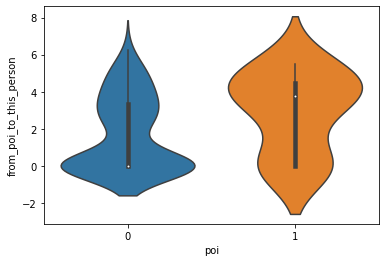

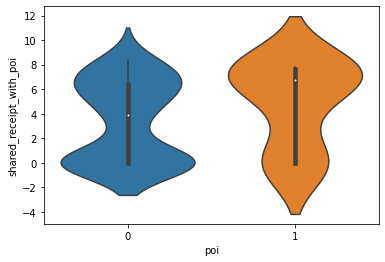

In [46]:
# 觀察"與poi聯絡的次數"特徵 與 目標的分布
# sns.regplot(x=app_train['from_poi_to_this_person'], y=app_train['poi'], fit_reg=False)
sns.violinplot(x=app_train['poi'], y=np.log1p(app_train['from_poi_to_this_person']), fit_reg=False, scale="width")
# sns.boxplot(x=app_train['poi'], y=np.log1p(app_train['from_poi_to_this_person']))
plt.show()
sns.violinplot(x=app_train['poi'], y=np.log1p(app_train['shared_receipt_with_poi']), fit_reg=False, scale="width")
# sns.boxplot(x=app_train['poi'], y=np.log1p(app_train['shared_receipt_with_poi']))
plt.show()

In [47]:
#刪 poi
train_Y = app_train['poi']
ids = app_test['name']
app_train = app_train.drop(['poi'] , axis=1)
df = pd.concat([app_train,app_test])
df

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,84,1750000.0,0.0,-3504386.0,0.0,42,19794175.0,46950.0,18.0,42.0,...,0.0,1617011.0,174839.0,2748364.0,0.0,420636.0,864.0,905.0,505050.0,22542539.0
1,92,5600000.0,0.0,0.0,0.0,29,19250000.0,29336.0,108.0,88.0,...,0.0,1920000.0,22122.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,91,200000.0,0.0,-4167.0,0.0,62,1624396.0,22884.0,39.0,13.0,...,0.0,0.0,1573324.0,869220.0,0.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,58,800000.0,0.0,0.0,0.0,55,0.0,118134.0,0.0,0.0,...,0.0,602671.0,907502.0,985032.0,0.0,224305.0,0.0,0.0,2652612.0,985032.0
4,15,1250000.0,0.0,-262500.0,0.0,10,0.0,35818.0,144.0,199.0,...,0.0,375304.0,486.0,126027.0,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,BIBI PHILIPPE A,1000000.0,NaN,NaN,NaN,philippe.bibi@enron.com,1465734.0,38559.0,40.0,23.0,...,NaN,369721.0,425688.0,378082.0,NaN,213625.0,1336.0,1607.0,2047593.0,1843816.0
29,SHERRIFF JOHN R,1500000.0,NaN,NaN,NaN,john.sherriff@enron.com,1835558.0,NaN,92.0,28.0,...,NaN,554422.0,1852186.0,1293424.0,NaN,428780.0,2103.0,3187.0,4335388.0,3128982.0
30,GIBBS DANA R,NaN,504610.0,NaN,NaN,dana.gibbs@enron.com,2218275.0,NaN,12.0,0.0,...,NaN,461912.0,NaN,NaN,NaN,NaN,23.0,169.0,966522.0,2218275.0
31,LINDHOLM TOD A,200000.0,204075.0,NaN,NaN,tod.lindholm@enron.com,2549361.0,57727.0,NaN,NaN,...,NaN,175000.0,2630.0,514847.0,NaN,236457.0,NaN,NaN,875889.0,3064208.0


In [48]:
df.isnull().sum()

name                          0
bonus                        12
deferral_payments            22
deferred_income              18
director_fees                29
email_address                 5
exercised_stock_options      12
expenses                     11
from_messages                12
from_poi_to_this_person      12
from_this_person_to_poi      12
loan_advances                31
long_term_incentive          16
other                         9
restricted_stock              5
restricted_stock_deferred    25
salary                       11
shared_receipt_with_poi      12
to_messages                  12
total_payments                4
total_stock_value             5
dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


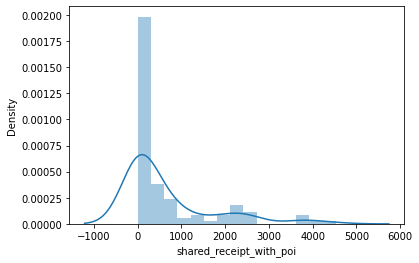

In [49]:
# 顯示 bonus 的散佈圖
#bonus, deferral_payments, deferred_income, director_fees, exercised_stock_options, expenses, loan_advances, 
#long_term_incentive, other, restricted_stock, restricted_stock_deferred, salary, total_payments, total_stock_value
train_num = train_Y.shape[0]

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['shared_receipt_with_poi'][:train_num])
plt.show()

In [50]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#補空缺值 (測試值部分)
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:  
    if df[c].dtype == 'object':
        df[c] = df[c].fillna('None')
        df[c] = LEncoder.fit_transform(list(df[c].values))
    elif df[c].dtype == 'float64' or df[c].dtype == 'int64':
        df[c] = df[c].fillna(0)
    #df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,95,1750000.0,0.0,-3504386.0,0.0,37,19794175.0,46950.0,18.0,42.0,...,0.0,1617011.0,174839.0,2748364.0,0.0,420636.0,864.0,905.0,505050.0,22542539.0
1,104,5600000.0,0.0,0.0,0.0,22,19250000.0,29336.0,108.0,88.0,...,0.0,1920000.0,22122.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,103,200000.0,0.0,-4167.0,0.0,59,1624396.0,22884.0,39.0,13.0,...,0.0,0.0,1573324.0,869220.0,0.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,67,800000.0,0.0,0.0,0.0,51,0.0,118134.0,0.0,0.0,...,0.0,602671.0,907502.0,985032.0,0.0,224305.0,0.0,0.0,2652612.0,985032.0
4,20,1250000.0,0.0,-262500.0,0.0,2,0.0,35818.0,144.0,199.0,...,0.0,375304.0,486.0,126027.0,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,115,1000000.0,0.0,0.0,0.0,103,1465734.0,38559.0,40.0,23.0,...,0.0,369721.0,425688.0,378082.0,0.0,213625.0,1336.0,1607.0,2047593.0,1843816.0
29,141,1500000.0,0.0,0.0,0.0,97,1835558.0,0.0,92.0,28.0,...,0.0,554422.0,1852186.0,1293424.0,0.0,428780.0,2103.0,3187.0,4335388.0,3128982.0
30,126,0.0,504610.0,0.0,0.0,85,2218275.0,0.0,12.0,0.0,...,0.0,461912.0,0.0,0.0,0.0,0.0,23.0,169.0,966522.0,2218275.0
31,132,200000.0,204075.0,0.0,0.0,112,2549361.0,57727.0,0.0,0.0,...,0.0,175000.0,2630.0,514847.0,0.0,236457.0,0.0,0.0,875889.0,3064208.0


In [51]:
#進行規則計算/比較, 修正total_stock_value, total_payments異常值:
df['total_stock_value_N'] = df['exercised_stock_options']+df['restricted_stock']+df['restricted_stock_deferred']
display(df[df['total_stock_value_N']!=df['total_stock_value']])

df['total_payments_N'] = df['bonus']+df['deferral_payments']+df['deferred_income']+\
                                df['director_fees']+df['expenses']+df['loan_advances']+\
                                df['long_term_incentive']+df['other']+df['salary']
display(df[df['total_payments_N']!=df['total_payments']])

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_stock_value_N
26,114,0.0,0.0,0.0,137864.0,108,2604490.0,0.0,29.0,0.0,...,0.0,137864.0,-2604490.0,15456290.0,0.0,463.0,523.0,15456290.0,0.0,15456290.0


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_stock_value_N,total_payments_N
26,114,0.0,0.0,0.0,137864.0,108,2604490.0,0.0,29.0,0.0,...,137864.0,-2604490.0,15456290.0,0.0,463.0,523.0,15456290.0,0.0,15456290.0,275728.0


In [52]:
df = df.drop(['total_stock_value','total_payments'] , axis=1)

In [53]:
# 製作新特徵看效果: 
df['Contact_poi_Multi'] = df['from_poi_to_this_person'] * df['shared_receipt_with_poi']

In [54]:
df

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_stock_value_N,total_payments_N,Contact_poi_Multi
0,95,1750000.0,0.0,-3504386.0,0.0,37,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,2748364.0,0.0,420636.0,864.0,905.0,22542539.0,505050.0,36288.0
1,104,5600000.0,0.0,0.0,0.0,22,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,6843672.0,0.0,1111258.0,2042.0,3627.0,26093672.0,8682716.0,179696.0
2,103,200000.0,0.0,-4167.0,0.0,59,1624396.0,22884.0,39.0,13.0,...,0.0,1573324.0,869220.0,0.0,211844.0,91.0,225.0,2493616.0,2003885.0,1183.0
3,67,800000.0,0.0,0.0,0.0,51,0.0,118134.0,0.0,0.0,...,602671.0,907502.0,985032.0,0.0,224305.0,0.0,0.0,985032.0,2652612.0,0.0
4,20,1250000.0,0.0,-262500.0,0.0,2,0.0,35818.0,144.0,199.0,...,375304.0,486.0,126027.0,0.0,240189.0,2188.0,2598.0,126027.0,1639297.0,435412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,115,1000000.0,0.0,0.0,0.0,103,1465734.0,38559.0,40.0,23.0,...,369721.0,425688.0,378082.0,0.0,213625.0,1336.0,1607.0,1843816.0,2047593.0,30728.0
29,141,1500000.0,0.0,0.0,0.0,97,1835558.0,0.0,92.0,28.0,...,554422.0,1852186.0,1293424.0,0.0,428780.0,2103.0,3187.0,3128982.0,4335388.0,58884.0
30,126,0.0,504610.0,0.0,0.0,85,2218275.0,0.0,12.0,0.0,...,461912.0,0.0,0.0,0.0,0.0,23.0,169.0,2218275.0,966522.0,0.0
31,132,200000.0,204075.0,0.0,0.0,112,2549361.0,57727.0,0.0,0.0,...,175000.0,2630.0,514847.0,0.0,236457.0,0.0,0.0,3064208.0,875889.0,0.0


In [60]:
# 計算各模型基礎分數
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#搭配最大最小化
MMEncoder = MinMaxScaler()
df_mm = MMEncoder.fit_transform(df)
train_num = train_Y.shape[0]
train_X = df_mm[:train_num]
LR = LogisticRegression()
print(f'LogisticRegression Score         : {cross_val_score(LR, train_X, train_Y, cv=5).mean()}')
RF = RandomForestClassifier()
print(f'RandomForestClassifier Score     : {cross_val_score(RF, train_X, train_Y, cv=5).mean()}')
GBDT = GradientBoostingClassifier()
print(f'GradientBoostingClassifier Score : {cross_val_score(GBDT, train_X, train_Y, cv=5).mean()}')

LogisticRegression Score         : 0.884189723320158
RandomForestClassifier Score     : 0.8928853754940711
GradientBoostingClassifier Score : 0.8395256916996047


In [61]:
from sklearn.preprocessing import StandardScaler

# 搭配標準化 (X)
df_temp = StandardScaler().fit_transform(df)
train_num = train_Y.shape[0]
train_X = df_temp[:train_num]
LR = LogisticRegression()
print(f'LogisticRegression Score         : {cross_val_score(LR, train_X, train_Y, cv=5).mean()}')
RF = RandomForestClassifier()
print(f'RandomForestClassifier Score     : {cross_val_score(RF, train_X, train_Y, cv=5).mean()}')
GBDT = GradientBoostingClassifier()
print(f'GradientBoostingClassifier Score : {cross_val_score(GBDT, train_X, train_Y, cv=5).mean()}')

LogisticRegression Score         : 0.875889328063241
RandomForestClassifier Score     : 0.8928853754940711
GradientBoostingClassifier Score : 0.8391304347826087


In [196]:
#'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'loan_advances', 
#'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'total_payments', 'total_stock_value'
# 取lop1p去偏態 (只有數值>=0的欄位才能做處理)
# (掠過)
log1p_cols = ['bonus', 'director_fees', 'exercised_stock_options', 'expenses', 'loan_advances', 
             'long_term_incentive', 'other', 'salary', 'total_payments']
for col in log1p_cols:
    df[col] = np.log1p(df[col])
    
df.describe()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,146.000000,146.000000,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,1.460000e+02
mean,72.500000,7.648413,4.387965e+05,-3.827622e+05,1.318645,42.575342,9.729579,6.789197,358.602740,38.226027,...,0.437464,5.933559,6.395560,1.749257e+06,2.051637e+04,8.070261,692.986301,1221.589041,11.599808,5.846018e+06
std,42.290661,6.825948,2.741325e+06,2.378250e+06,3.666848,36.897591,6.565177,5.121815,1441.259868,73.901124,...,2.644036,6.597591,5.518466,1.089995e+07,1.439661e+06,5.988279,1072.969492,2226.770637,5.126997,3.624681e+07
min,0.000000,0.000000,-1.025000e+05,-2.799289e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.604490e+06,-7.576788e+06,0.000000,0.000000,0.000000,0.000000,-4.409300e+04
25%,36.250000,0.000000,0.000000e+00,-3.792600e+04,0.000000,2.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.115000e+03,0.000000e+00,0.000000,0.000000,0.000000,11.449142,2.288695e+05
50%,72.500000,12.611541,0.000000e+00,0.000000e+00,0.000000,38.500000,13.318414,9.910361,16.500000,2.500000,...,0.000000,0.000000,6.867369,3.605280e+05,0.000000e+00,12.257702,102.500000,289.000000,13.754724,9.659550e+05
75%,108.750000,13.592368,9.684500e+03,0.000000e+00,0.000000,74.750000,14.354348,10.891923,51.250000,40.750000,...,0.000000,12.834856,11.922432,8.145280e+05,0.000000e+00,12.509319,893.500000,1585.750000,14.492625,2.319991e+06
max,145.000000,18.393758,3.208340e+07,0.000000e+00,14.150924,111.000000,19.557757,15.470915,14368.000000,528.000000,...,18.245434,17.697526,17.568950,1.303223e+08,1.545629e+07,17.100333,5521.000000,15149.000000,19.551717,4.345095e+08


In [197]:
# (掠過)　　
df_fixed = MMEncoder.fit_transform(df)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8853754940711462

In [62]:
df.isnull().sum()

name                         0
bonus                        0
deferral_payments            0
deferred_income              0
director_fees                0
email_address                0
exercised_stock_options      0
expenses                     0
from_messages                0
from_poi_to_this_person      0
from_this_person_to_poi      0
loan_advances                0
long_term_incentive          0
other                        0
restricted_stock             0
restricted_stock_deferred    0
salary                       0
shared_receipt_with_poi      0
to_messages                  0
total_stock_value_N          0
total_payments_N             0
Contact_poi_Multi            0
dtype: int64

In [63]:
# 縮放器 : 設定特徵縮放到 0~1 區間
MMEncoder = MinMaxScaler(feature_range = (0, 1))

train_num = train_Y.shape[0]
df_mm = MMEncoder.fit_transform(df)
train = df_mm[:train_num]
test = df_mm[train_num:]


In [226]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
# (掠過)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train, train_Y, test_size=0.25)
# np.ravel: 將DataFrame shape:(1000,1) 轉成numpy一維陣列 1D-array 即 shape=(1000,)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(84, 21)
(84,)
(29, 21)
(29,)


In [64]:
#類別平衡切分:　照原訓練集中1與0的比例分布, 切分測試集(共28筆)中:必須有3筆為1, 25筆為0的資料
# 假設 test_size=0.25
print("測試集筆數: ", round(df[:train_num].shape[0] * 0.25))
print("測試集為1的筆數: ", round(len(np.where(train_Y==1)[0]) * 0.25))
print("測試集為0的筆數: ", round(df[:train_num].shape[0] * 0.25) - round(len(np.where(train_Y==1)[0]) * 0.25))

測試集筆數:  28
測試集為1的筆數:  3
測試集為0的筆數:  25


In [65]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

#類別平衡切分:
test_size = 0.25

y1size = round(len(np.where(train_Y==1)[0]) * test_size)
y0size = round(df[:train_num].shape[0] * 0.25) - round(len(np.where(train_Y==1)[0]) * test_size)

# 切分訓練集/測試集
# 選出 train_Y 等於 1 的 index 與 train_Y 等於 0 的 index
#取類別1
y1_index = np.where(train_Y==1)[0]
x_train1, x_test1, y_train1, y_test1 = train_test_split(train[y1_index], train_Y[y1_index], test_size=y1size)

#取類別0
y0_index = np.where(train_Y==0)[0]
x_train0, x_test0, y_train0, y_test0 = train_test_split(train[y0_index], train_Y[y0_index], test_size=y0size)


#合併
x_train, y_train  = np.concatenate((x_train1, x_train0), axis=0), np.concatenate((y_train1, y_train0), axis=0) 
x_test, y_test  = np.concatenate((x_test1, x_test0), axis=0), np.concatenate((y_test1, y_test0), axis=0) 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_test

(84, 22)
(84,)
(28, 22)
(28,)


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
# Model: 邏輯斯迴歸
# 建立模型
lr = LogisticRegression()

# 訓練模型
lr.fit(x_train, y_train)

# 預測測試集
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
print("ROC_AUC: ", auc)

Accuracy:  0.8928571428571429
ROC_AUC:  0.9199999999999999


In [153]:
#multiclass多分類評分: 須加上average參數 average{'micro', 'macro', 'samples','weighted', 'binary'} or None, default='binary'
# (掠過) --預測結果都為0
f1 = metrics.f1_score(y_test, y_pred) # 使用 F1-Score 評估: If average=None, the scores for each class are returned.
precision = metrics.precision_score(y_test, y_pred) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.0
Precision:  0.0
Recall:  0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
#(2) 以Model: 邏輯斯迴歸 訓練 all trainset, 預測testset

# 建立模型
lr = LogisticRegression()

# 訓練模型
lr.fit(train, train_Y)

# 預測測試集
lr_pred = lr.predict_proba(test)[:,1]
print(lr_pred)
print(lr_pred.shape)

[0.28422478 0.21575891 0.19516105 0.14089458 0.20764103 0.18124326
 0.27052878 0.15921066 0.19998838 0.16637078 0.19912358 0.1947962
 0.18427229 0.16383337 0.1865767  0.1745693  0.18719906 0.17468113
 0.16121745 0.17050414 0.63008984 0.19347914 0.19445808 0.1797346
 0.17957798 0.18411708 0.18713909 0.16649024 0.19559237 0.20735775
 0.16313753 0.19086674 0.20559352]
(33,)


In [70]:
# 計算提交結果
submit = pd.DataFrame({'name': ids, 'poi': lr_pred})
submit

,name,poi
0,BELDEN TIMOTHY N,0.284225
1,BOWEN JR RAYMOND M,0.215759
2,HANNON KEVIN P,0.195161
3,DELAINEY DAVID W,0.140895
4,CAUSEY RICHARD A,0.207641
5,HICKERSON GARY J,0.181243
6,FREVERT MARK A,0.270529
7,CHAN RONNIE,0.159211
8,DONAHUE JR JEFFREY M,0.199988
9,REYNOLDS LAWRENCE,0.166371


In [71]:
# 線性迴歸預測檔預測檔 
out_dir = './output/'
f_out = os.path.join(out_dir, 'EnronFraudDataset_lr.csv')
submit.to_csv(f_out, index=False)

In [72]:
# Model: 隨機森林
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# n_estimators=10, #決策樹的數量
# max_features="auto", #選取的特徵數量 The number of features to consider when looking for the best split: 
#                      If “auto”, then max_features=sqrt(n_features)
# 建立模型 (使用 50 顆樹，每棵樹的最大深度為 3)
rf = RandomForestClassifier(n_estimators=50, max_depth=3, max_features='auto', random_state=10)

# 訓練模型
rf.fit(x_train, y_train)

# 預測測試集
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
print("ROC_AUC: ", auc)

Accuracy:  0.8928571428571429
ROC_AUC:  0.9466666666666667


In [78]:
from sklearn.model_selection import GridSearchCV

# 設定要訓練的超參數組合
n_estimators = [int(x) for x in np.linspace(30, 120, num = 10)]
max_depth = [int(x) for x in range(3, 10)]
max_features = ['auto', 'sqrt']
#min_samples_split = [2, 4, 6, 10]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features) 
                  #min_samples_split=min_samples_split)
print(param_grid)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
## GridSearchCV:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
## scoring選擇 https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid_search = GridSearchCV(rf, param_grid, scoring='roc_auc', n_jobs=-1, verbose=2)
# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)
# 預設會跑 5-fold cross-validadtion，總共 140 (10*7*2) 種參數組合，總共要 train 700 次模型

{'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'max_features': ['auto', 'sqrt']}
Fitting 5 folds for each of 140 candidates, totalling 700 fits


In [79]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.821905 using {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 40}


In [80]:
# 使用最佳參數重新建立模型
rf = RandomForestClassifier(n_estimators=grid_result.best_params_['n_estimators'], 
                            max_depth=grid_result.best_params_['max_depth'], 
                            max_features=grid_result.best_params_['max_features'],
                            #min_samples_split=grid_result.best_params_['min_samples_split'],
                            random_state=10)

# 訓練模型
rf.fit(x_train, y_train)

# 預測測試集
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
# 調整參數後
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
print("ROC_AUC: ", auc)

Accuracy:  0.8928571428571429
ROC_AUC:  0.9466666666666667


In [83]:
rf.feature_importances_

array([0.0401552 , 0.04467972, 0.00489508, 0.05682054, 0.        ,
       0.02303473, 0.12177369, 0.14228974, 0.02580983, 0.03192216,
       0.02687998, 0.01363277, 0.03104799, 0.08804136, 0.08360856,
       0.        , 0.04709248, 0.01414286, 0.0170544 , 0.12778331,
       0.03951755, 0.01981807])

In [84]:
# 隨機森林擬合後, 將結果依照重要性由高到低排序
feats = pd.Series(data=rf.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

expenses                     0.142290
total_stock_value_N          0.127783
exercised_stock_options      0.121774
other                        0.088041
restricted_stock             0.083609
deferred_income              0.056821
salary                       0.047092
bonus                        0.044680
name                         0.040155
total_payments_N             0.039518
from_poi_to_this_person      0.031922
long_term_incentive          0.031048
from_this_person_to_poi      0.026880
from_messages                0.025810
email_address                0.023035
Contact_poi_Multi            0.019818
to_messages                  0.017054
shared_receipt_with_poi      0.014143
loan_advances                0.013633
deferral_payments            0.004895
restricted_stock_deferred    0.000000
director_fees                0.000000
dtype: float64

In [85]:
train_num

112

In [94]:
# 高重要性特徵 + 隨機森林
fnum = round(feats.count()*2/3) 
high_feature = list(feats[:fnum].index)
print(high_feature)

df_high = MMEncoder.fit_transform(df[high_feature])
train_X = df_high[:train_num]
cross_val_score(rf, train_X, train_Y, cv=5).mean()

['expenses', 'total_stock_value_N', 'exercised_stock_options', 'other', 'restricted_stock', 'deferred_income', 'salary', 'bonus', 'name', 'total_payments_N', 'from_poi_to_this_person', 'long_term_incentive', 'from_this_person_to_poi', 'from_messages', 'email_address']


0.884189723320158

In [95]:
# 原始特徵 + 隨機森林
df_mm = MMEncoder.fit_transform(df)
train_X = df_mm[:train_num]
print(f'RandomForestClassifier Score     : {cross_val_score(rf, train_X, train_Y, cv=5).mean()}')

RandomForestClassifier Score     : 0.8754940711462451


In [96]:
# 以高重要性特徵: 重訂 train, test
train = df_high[:train_num]
test = df_high[train_num:]

In [357]:
# 製作新特徵看效果: 將特徵重要性最高的兩個特徵做特徵組合 (X)
df['Add_op'] = (df['exercised_stock_options'] + df['total_stock_value_N']) / 2
df['Multi_op'] = df['exercised_stock_options'] * df['total_stock_value_N']

high_feature.append('Add_op')
high_feature.append('Multi_op')

df_high = MMEncoder.fit_transform(df[high_feature])
train_X = df_high[:train_num]
cross_val_score(rf, train_X, train_Y, cv=5).mean()
# df_mm = MMEncoder.fit_transform(df)
# train_X = df_mm[:train_num]
# cross_val_score(rf, train_X, train_Y, cv=5).mean()

0.8928853754940711

In [102]:
#(3) 以Model: 隨機森林 訓練 all trainset, 預測testset

# 建立模型
# rf = RandomForestClassifier(n_estimators=50, max_depth=3, max_features='auto', random_state=10)
rf = RandomForestClassifier(n_estimators=40, max_depth=4, max_features='auto', random_state=10)

# 訓練模型
rf.fit(train, train_Y)

# 預測測試集
rf_pred = rf.predict_proba(test)[:,1]
print(rf_pred)
print(rf_pred.shape)

[0.35508057 0.28275759 0.41873587 0.19262157 0.3852109  0.18821073
 0.56124098 0.03718018 0.17265972 0.0969024  0.15758429 0.03010202
 0.05339748 0.03010202 0.42672739 0.03010202 0.04696699 0.27457942
 0.13176451 0.03010202 0.79893939 0.37273846 0.12404602 0.06861212
 0.03856067 0.0583923  0.13053909 0.03856067 0.1850187  0.42538827
 0.03010202 0.03748302 0.26858766]
(33,)


In [103]:
# 計算提交結果
submit = pd.DataFrame({'name': ids, 'poi': rf_pred})
submit

,name,poi
0,BELDEN TIMOTHY N,0.355081
1,BOWEN JR RAYMOND M,0.282758
2,HANNON KEVIN P,0.418736
3,DELAINEY DAVID W,0.192622
4,CAUSEY RICHARD A,0.385211
5,HICKERSON GARY J,0.188211
6,FREVERT MARK A,0.561241
7,CHAN RONNIE,0.037180
8,DONAHUE JR JEFFREY M,0.172660
9,REYNOLDS LAWRENCE,0.096902


In [104]:
# 隨機森林預測檔 
out_dir = './output/'
f_out = os.path.join(out_dir, 'EnronFraudDataset_rf.csv')
submit.to_csv(f_out, index=False)

In [105]:
# Model: 梯度提升機
from sklearn.ensemble import GradientBoostingClassifier

# 建立模型
clf = GradientBoostingClassifier(random_state=10)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [106]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
print("ROC_AUC: ", auc)

Accuracy:  0.8928571428571429
ROC_AUC:  0.9466666666666667


In [107]:
#multiclass多分類評分: 須加上average參數 average{'micro', 'macro', 'samples','weighted', 'binary'} or None, default='binary'
f1 = metrics.f1_score(y_test, y_pred) # 使用 F1-Score 評估: If average=None, the scores for each class are returned.
precision = metrics.precision_score(y_test, y_pred) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.0
Precision:  0.0
Recall:  0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5, stop = 60, num = 12)]
learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
max_features = ['sqrt', 'log2', None]
max_depth = [int(x) for x in range(3,20,2)]
subsample = [0.75, 0.8, 0.9, 1.0]
min_samples_split = [2, 4, 6, 8, 10]
#min_samples_leaf = [1, 3, 4]


random_grid = {'n_estimators': n_estimators,
'learning_rate': learning_rate,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'subsample': subsample}


random_search = RandomizedSearchCV(estimator = clf,
               param_distributions = random_grid, scoring='roc_auc',
               n_iter = 200, cv = 5, verbose=2, n_jobs = -1)
# 開始搜尋最佳參數
random_result = random_search.fit(x_train, y_train)
random_result

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 55,
                                                         60],
                                        'subsample': [0.75, 0.8, 0.9, 1.0]},
                   scoring='roc_auc', verbose=2)

In [109]:
# print the best parameters
print ('Best Parameters: ', random_search.best_params_, ' \n')

# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best Parameters:  {'subsample': 1.0, 'n_estimators': 15, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': 19, 'learning_rate': 0.05}  

Best Accuracy: 0.829524 using {'subsample': 1.0, 'n_estimators': 15, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': 19, 'learning_rate': 0.05}


In [110]:
# 使用最佳參數重新建立模型
# Best Accuracy: 0.893333 
#using {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': 13, 
#       'learning_rate': 0.05}

clf_bestparam = GradientBoostingClassifier(subsample=random_result.best_params_['subsample'],
                                           n_estimators=random_result.best_params_['n_estimators'],
                                           min_samples_split=random_result.best_params_['n_estimators'],
                                           max_features=random_result.best_params_['max_features'],
                                           max_depth=random_result.best_params_['max_depth'],
                                           learning_rate=random_result.best_params_['learning_rate'], random_state=10)

# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [111]:
# 調整參數後
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
print("ROC_AUC: ", auc)

Accuracy:  0.8928571428571429
ROC_AUC:  0.9466666666666667


In [113]:
#(1) 以Model: 梯度提升機 訓練 all trainset, 預測testset
# 建立模型
# Best Accuracy: 0.856190 using {'subsample': 1.0, 'n_estimators': 30, 'min_samples_split': 2, 
#                               'max_features': 'log2', 'max_depth': 19, 'learning_rate': 0.05}
# Best Accuracy: 0.864286 using {'subsample': 1.0, 'n_estimators': 10, 'min_samples_split': 8, 
#                               'max_features': 'log2', 'max_depth': 11, 'learning_rate': 0.05}
# Best Accuracy: 0.829524 using {'subsample': 1.0, 'n_estimators': 15, 'min_samples_split': 8, 
#                               'max_features': 'log2', 'max_depth': 19, 'learning_rate': 0.05}
gbdt = GradientBoostingClassifier(subsample=1.0,
                                  n_estimators=15,
                                  min_samples_split=8,
                                  max_features='log2',
                                  max_depth=19,
                                  learning_rate=0.05, random_state=10)

# 訓練模型
gbdt.fit(train, train_Y)

# 預測測試集
gbdt_pred = gbdt.predict_proba(test)[:,1]
print(gbdt_pred)
print(gbdt_pred.shape)

[0.24749925 0.21943268 0.34462882 0.07178122 0.19612636 0.33341809
 0.32242573 0.05458369 0.08898178 0.05428695 0.06018916 0.05460329
 0.05827846 0.05456764 0.23896573 0.05460337 0.07841143 0.18727538
 0.1218954  0.05460349 0.5446841  0.18545815 0.06895541 0.05987358
 0.06317517 0.10020217 0.11125222 0.07024377 0.12695815 0.13614722
 0.0610256  0.0784402  0.24002051]
(33,)


In [114]:
# 計算提交結果
submit = pd.DataFrame({'name': ids, 'poi': gbdt_pred})
submit

,name,poi
0,BELDEN TIMOTHY N,0.247499
1,BOWEN JR RAYMOND M,0.219433
2,HANNON KEVIN P,0.344629
3,DELAINEY DAVID W,0.071781
4,CAUSEY RICHARD A,0.196126
5,HICKERSON GARY J,0.333418
6,FREVERT MARK A,0.322426
7,CHAN RONNIE,0.054584
8,DONAHUE JR JEFFREY M,0.088982
9,REYNOLDS LAWRENCE,0.054287


In [115]:
# 梯度提升機預測檔 
out_dir = './output/'
f_out = os.path.join(out_dir, 'EnronFraudDataset_gbdt.csv')
submit.to_csv(f_out, index=False)

In [116]:
#混合泛化預測
blending_pred = rf_pred*0.8  + gbdt_pred*0.2
submit = pd.DataFrame({'name': ids, 'poi': blending_pred})
submit

,name,poi
0,BELDEN TIMOTHY N,0.333564
1,BOWEN JR RAYMOND M,0.270093
2,HANNON KEVIN P,0.403914
3,DELAINEY DAVID W,0.168453
4,CAUSEY RICHARD A,0.347394
5,HICKERSON GARY J,0.217252
6,FREVERT MARK A,0.513478
7,CHAN RONNIE,0.040661
8,DONAHUE JR JEFFREY M,0.155924
9,REYNOLDS LAWRENCE,0.088379


In [117]:
out_dir = './output/'
f_out = os.path.join(out_dir, 'EnronFraudDataset_blending.csv')
submit.to_csv(f_out, index=False)

<img src="./img/kaggle_EnronFraudCompetition_2021120601.jpg" >